In [5]:
import pandas as pd
import numpy as np

In [6]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

In [7]:
ts = ts.cumsum()

In [8]:
ts.head()

2000-01-01    0.298366
2000-01-02   -0.136724
2000-01-03   -0.576200
2000-01-04    1.561820
2000-01-05    1.951319
Freq: D, dtype: float64

<Axes: >

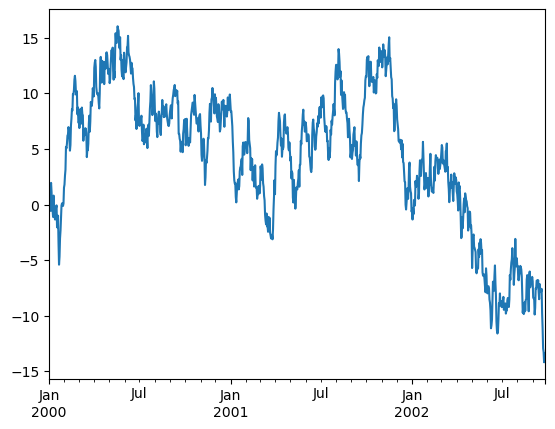

In [9]:
ts.plot()

In [10]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

In [11]:
df.head()

,A,B,C,D
2000-01-01,-1.581780,0.799546,1.672593,1.137146
2000-01-02,-0.952557,-1.374941,-0.604567,0.663070
2000-01-03,-0.869871,0.529360,0.348359,-2.101589
2000-01-04,-0.707766,-0.214000,1.419322,-2.087073
2000-01-05,0.666340,-0.652550,-0.016783,-0.159838


In [12]:
df = df.cumsum()

<Axes: >

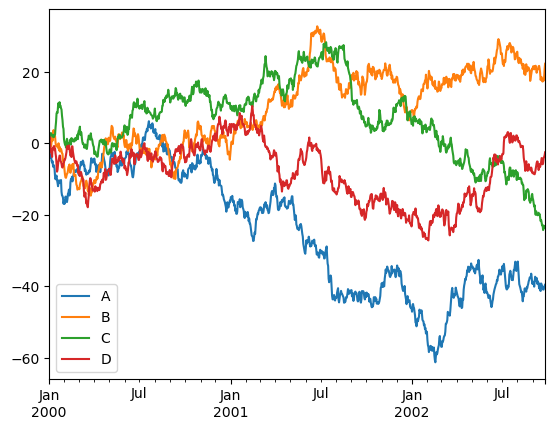

In [13]:
df.plot()

In [17]:
sales_df = pd.read_csv("C:/Users/HP/Documents/dm_office_sales.csv")

In [18]:
sales_df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [19]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [20]:
sales_df.describe()

,training level,work experience,salary,sales
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,1.262000,6.14200,90264.207000,339833.846000
std,0.925317,2.94797,17398.617174,108555.773316
min,0.000000,0.00000,41660.000000,53067.000000
25%,1.000000,4.00000,77584.000000,259257.500000
50%,1.000000,6.00000,89946.000000,338145.500000
75%,2.000000,8.00000,101834.250000,415210.250000
max,3.000000,16.00000,159148.000000,761477.000000


---
 ### Plot Types

#### Bar chart

In [28]:
division_values = sales_df['division'].value_counts()
division_values

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<Axes: >

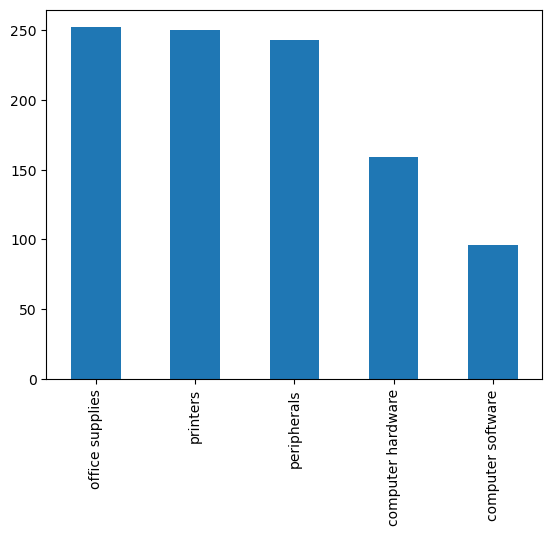

In [29]:
division_values.plot(kind="bar")

<Axes: >

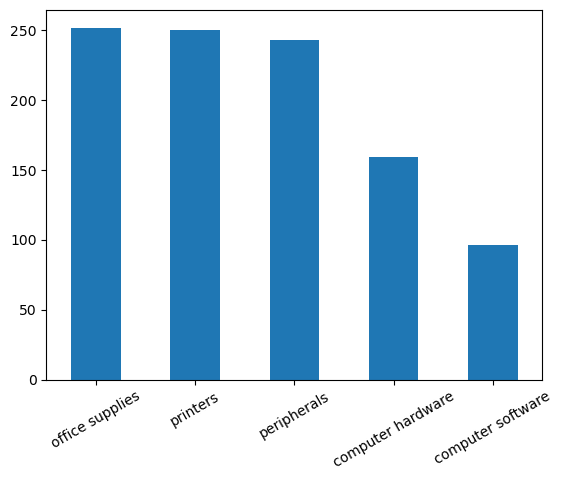

In [30]:
division_values.plot(kind="bar", rot=30)

<Axes: >

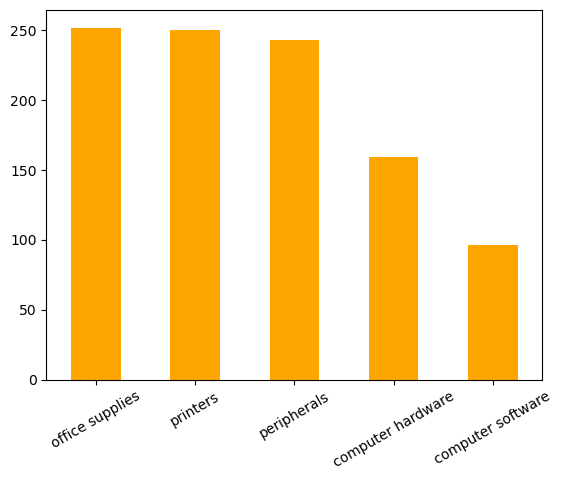

In [31]:
division_values.plot(kind="bar",
                     rot=30,
                     color="orange")

<Axes: >

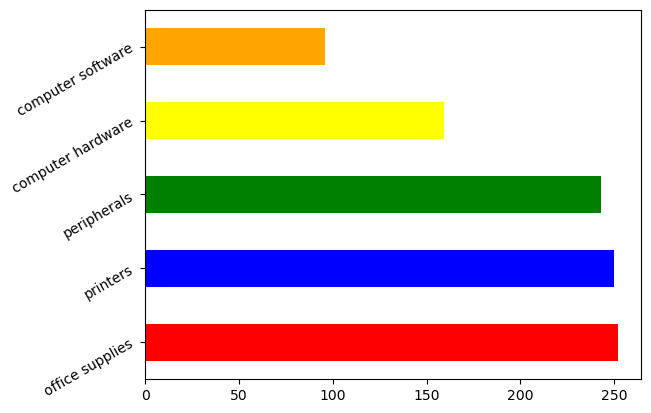

In [32]:
division_values.plot(kind="barh",
                     rot=30,
                     color=["red", "blue", "green", "yellow", "orange"])

In [33]:
sales_per_division = sales_df[["division", "sales"]].groupby("division").mean().reset_index()

In [34]:
sales_per_division["next_year_sales"] = sales_per_division["sales"] * 1.3

In [35]:
sales_per_division

,division,sales,next_year_sales
0,computer hardware,339183.830189,440938.979245
1,computer software,342898.270833,445767.752083
2,office supplies,341015.079365,443319.603175
3,peripherals,344932.563786,448412.332922
4,printers,332923.880000,432801.044000


<Axes: xlabel='division'>

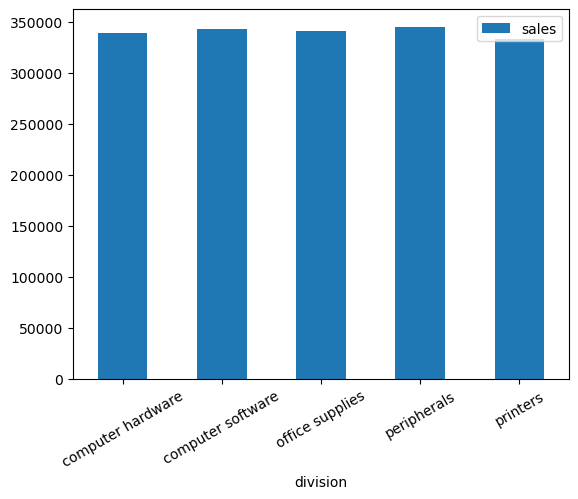

In [36]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y="sales",
                        rot=30)

<Axes: xlabel='division'>

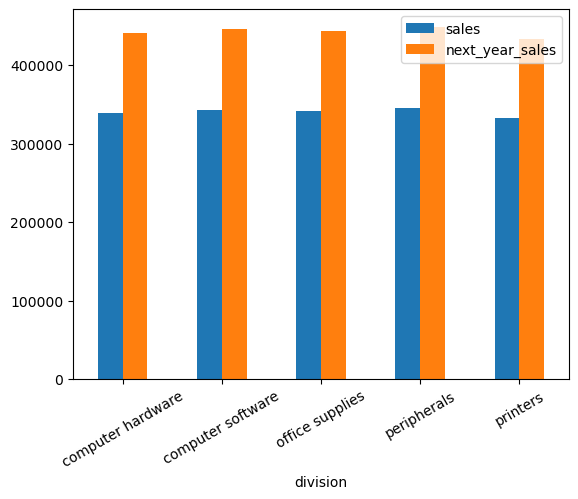

In [37]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        rot=30)

<Axes: xlabel='division'>

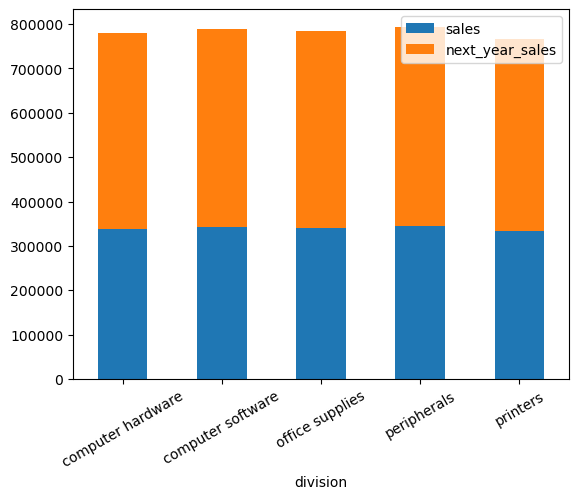

In [38]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        stacked=True,
                        rot=30)

<Axes: xlabel='Division', ylabel='Total sales'>

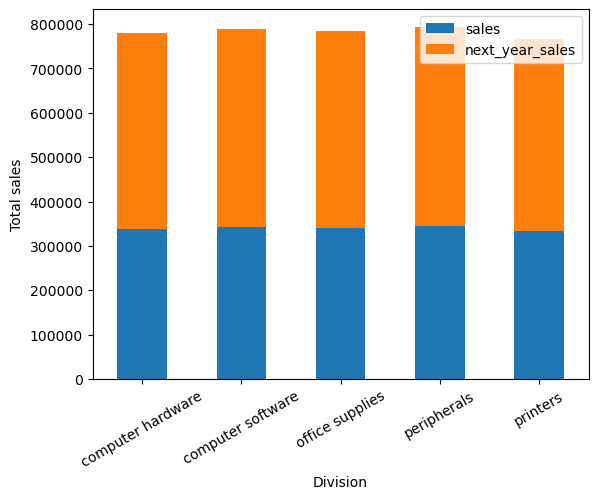

In [39]:
sales_per_division.plot(kind="bar",
                        x="division",
                        y=["sales", "next_year_sales"],
                        xlabel="Division",
                        ylabel="Total sales",
                        stacked=True,
                        rot=30)

#### Scatter plot

<Axes: xlabel='salary', ylabel='sales'>

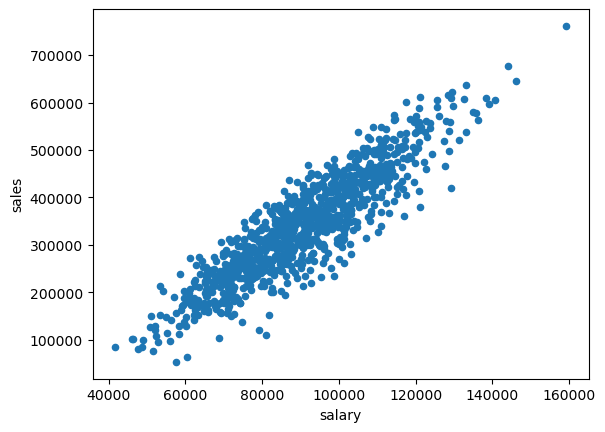

In [40]:
sales_df.plot(kind="scatter", x="salary", y="sales")

#### Histogram

<Axes: ylabel='Frequency'>

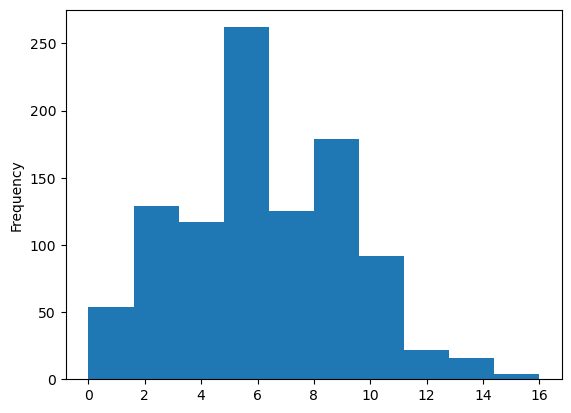

In [41]:
sales_df['work experience'].plot(kind="hist")

<Axes: ylabel='Frequency'>

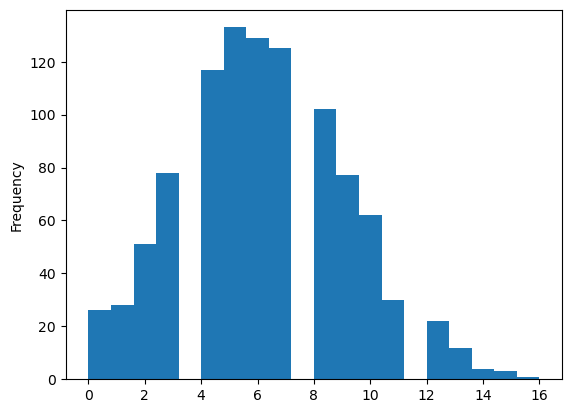

In [42]:
sales_df['work experience'].plot(kind="hist", bins=20)

#### KDE kernel density estimation 

<Axes: ylabel='Density'>

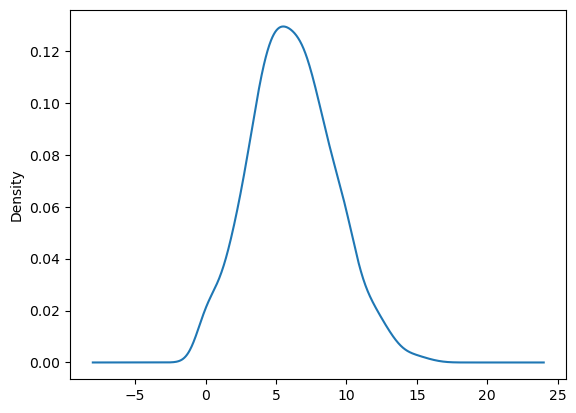

In [44]:
sales_df['work experience'].plot(kind='kde')

#### Pie chart

In [45]:
education_values = sales_df['level of education'].value_counts()
education_values

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

<Axes: ylabel='level of education'>

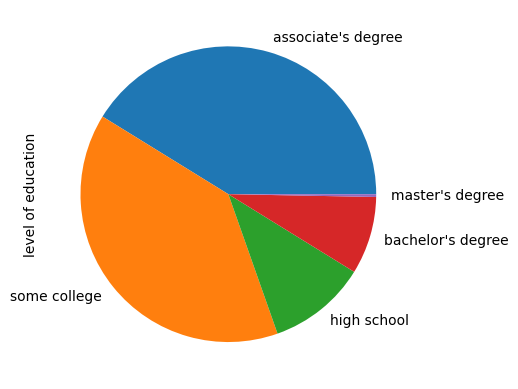

In [46]:
education_values.plot(kind="pie")

<Axes: ylabel='level of education'>

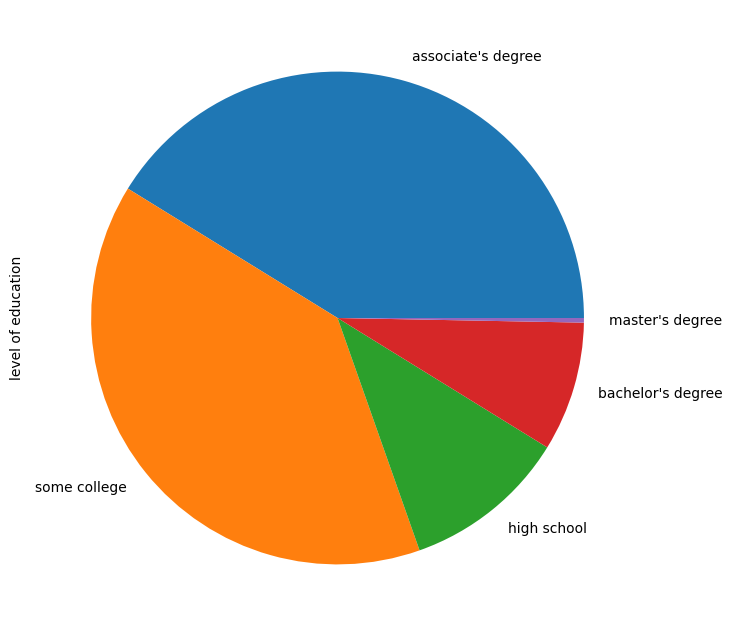

In [47]:
education_values.plot(kind="pie", figsize=(8,8))

<Axes: ylabel='level of education'>

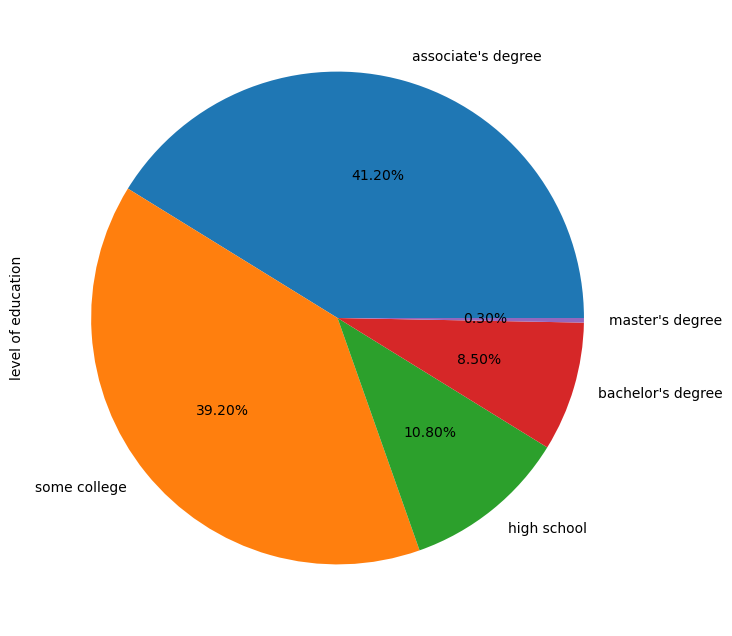

In [48]:
education_values.plot(kind="pie",
                      figsize=(8,8),
                      autopct='%1.2f%%')

#### Area chart

In [49]:
experience_values = sales_df['work experience'].value_counts()
experience_values.head()

5    133
6    129
7    125
4    117
8    102
Name: work experience, dtype: int64

In [50]:
experience_values = experience_values.sort_index()
experience_values.head()

0     26
1     28
2     51
3     78
4    117
Name: work experience, dtype: int64

<Axes: >

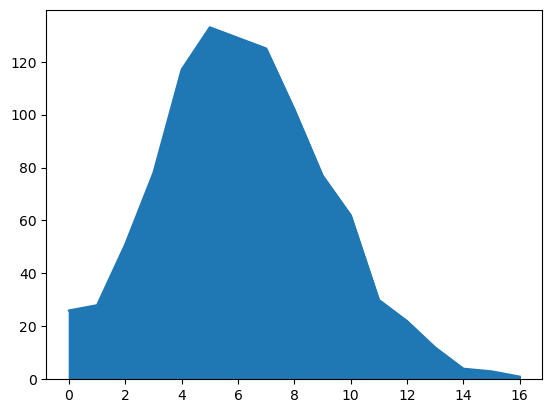

In [51]:
experience_values.plot(kind="area")

In [52]:
experience_values = sales_df['work experience'].value_counts()
experience_values = experience_values.sort_index()

In [53]:
new_df = pd.DataFrame({
    "exp_1": experience_values,
    "exp_2": experience_values / 2,
    "exp_3": experience_values / 7,
})

new_df.head()

,exp_1,exp_2,exp_3
0,26,13.0,3.714286
1,28,14.0,4.000000
2,51,25.5,7.285714
3,78,39.0,11.142857
4,117,58.5,16.714286


<Axes: >

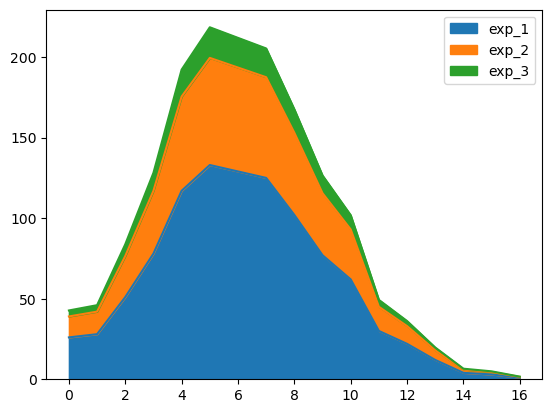

In [54]:
new_df.plot(kind="area")

<Axes: >

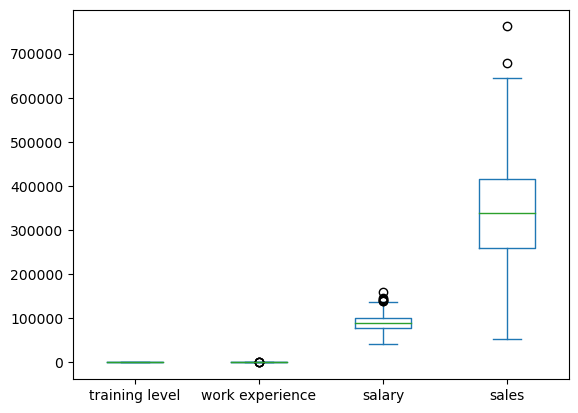

In [55]:
sales_df.plot(kind="box")

<Axes: >

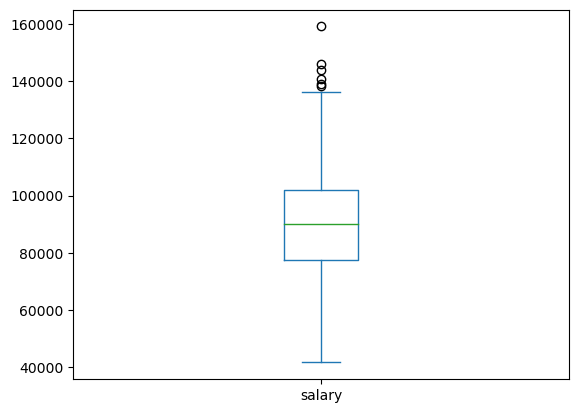

In [56]:
sales_df["salary"].plot(kind="box")

<Axes: >

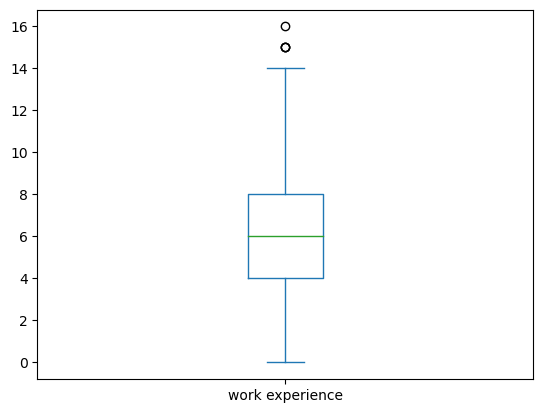

In [57]:
sales_df["work experience"].plot(kind="box")

---
### Extra customizations

<Axes: ylabel='Frequency'>

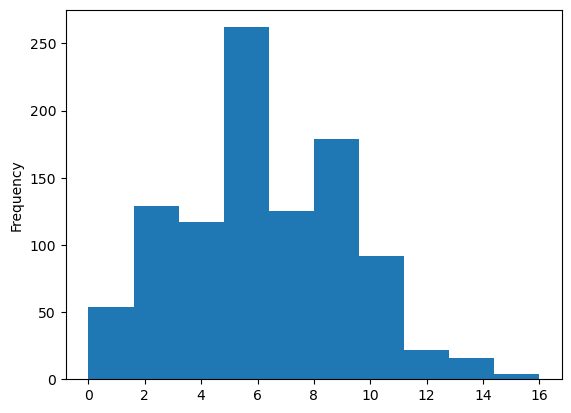

In [58]:
sales_df['work experience'].plot(kind="hist")

<Axes: ylabel='Frequency'>

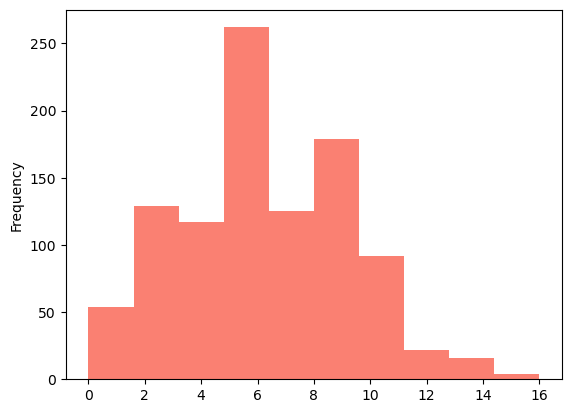

In [59]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon")

<Axes: title={'center': 'Histogram of Work experience'}, ylabel='Frequency'>

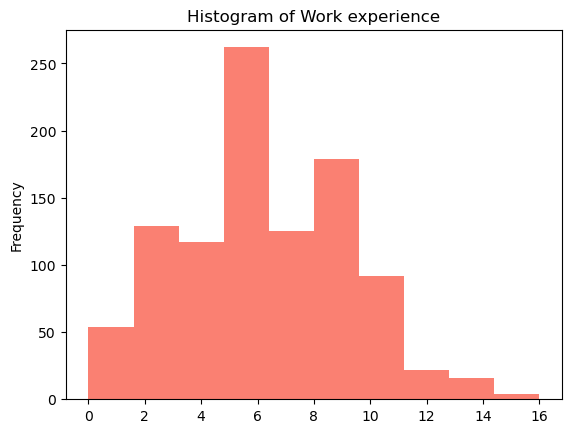

In [60]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 title="Histogram of Work experience")

<Axes: title={'center': 'Histogram of Work experience'}, ylabel='Frequency'>

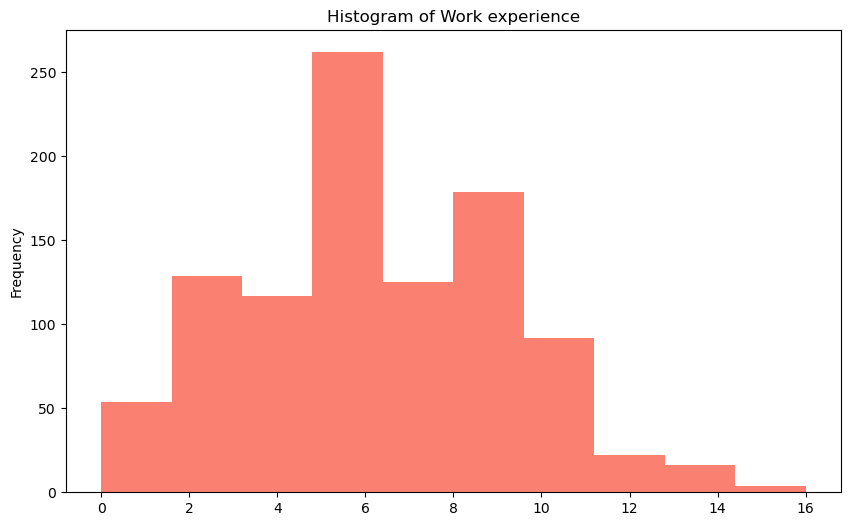

In [61]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 title="Histogram of Work experience")

In [62]:
import matplotlib.pyplot as plt

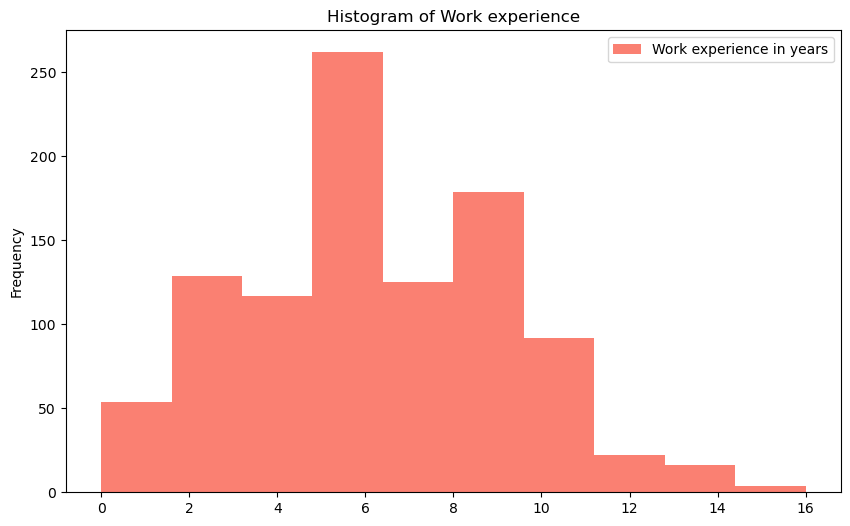

In [63]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()

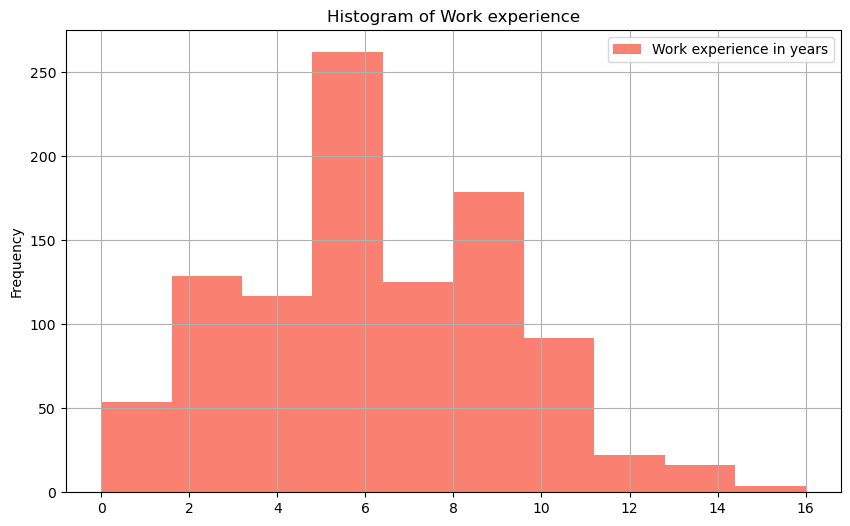

In [64]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 grid=True,
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()

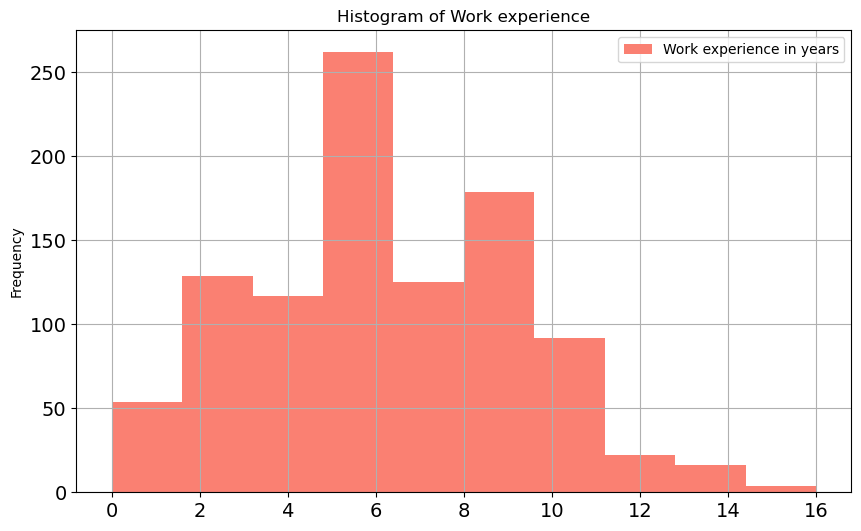

In [65]:
sales_df['work experience'].plot(kind="hist",
                                 color="salmon",
                                 figsize=(10,6),
                                 grid=True,
                                 fontsize=14,
                                 label="Work experience in years",
                                 title="Histogram of Work experience")

plt.legend()